# Modeling with Regression models

In [1]:
import gc
import sys
sys.path.append('../')

import pandas as pd
import numpy as np


from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
# %matplotlib inline


from src.fetch_data import DataLoader
# from src.exploration import Analysis
# from src.cleaning import CleanDataFrame
# from src.visualization import Plotters
from src.processing import FeatureEngineering
from src.modeling_pipeline import (
    run_train_pipeline, 
    get_pipeline,
    )


import mlflow


# cleaner = CleanDataFrame()
feature_engineering = FeatureEngineering()
# plotters = Plotters(w=6, h=4)

# Getting the data

In [5]:
# Then load the raw sales data
# data_path = 'data/merged/train.csv'
# version = 'merged_v3'
# repo = '../'

# train_df = DataLoader.dvc_get_data(data_path, version, repo)
# train_df['Date'] = pd.to_datetime(train_df['Date'])
# # drop customers colum
# train_df.drop(columns=['Customers'], inplace=True)
# train_df.info()
# load the test data
data_path = 'data/merged/test.csv'
version = 'raw_data'
repo = '../'

test_df = DataLoader.dvc_get_data(data_path, version, repo)
test_df['Date'] = pd.to_datetime(test_df['Date'])

/home/hat/dev-env/10Acadamy/week_3/Rossmann-Pharmaceuticals-Sales-Forcast/notebooks/../src/fetch_data.py:28: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(content), sep=",")
DataLoaderLogger - INFO - DVC: CSV file read with path: data/merged/train.csv | version: merged_v3 | from: ../


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   StoreType                  1017209 non-null  object        
 9   Assortment                 1017209 non-null  object        
 10  CompetitionDistance        1017209 non-null  float64       
 11  CompetitionOpenSinceMonth  1017209 no

I will add the additional columns from the feature engineering here

In [6]:
train_df = feature_engineering.transform(train_df)


FeatureEngineeringLogger - INFO - 9 new columns added to the dataframe
FeatureEngineeringLogger - INFO - Feature enginerring completed


In order to properly split the data, we need the timeframe for it. I will grab all the unique dates in the `Date` column

In [7]:
timeframe = train_df.Date.unique()
timeframe.sort()
print(f"Starts at {timeframe[0]} --- ends at: {timeframe[-1]}")
print(f"It spans for {len(timeframe)} days")

Starts at 2013-01-01T00:00:00.000000000 --- ends at: 2015-07-31T00:00:00.000000000
It spans for 942 days


# Modeling

In [7]:
pipeline = get_pipeline(model=RandomForestRegressor(n_estimators=5, n_jobs=4), 
                        x=train_df.drop(columns=['Sales']))

In [8]:
pipeline

TrainingPipeline(steps=[('preprocessor',
                         ColumnTransformer(transformers=[('num',
                                                          Pipeline(steps=[('scale',
                                                                           StandardScaler())]),
                                                          ['Store', 'DayOfWeek',
                                                           'Customers', 'Open',
                                                           'Promo',
                                                           'SchoolHoliday',
                                                           'CompetitionDistance',
                                                           'CompetitionOpenSinceYear',
                                                           'Promo2',
                                                           'Promo2SinceWeek',
                                                           'Promo2SinceYear',
                                                           'DistanceToNextHoliday',
                                                           'DistanceFromPrevHoliday',
                                                           'Year', 'Month',
                                                           'We...
                                                                                                                        'is_month_end',
                                                                                                                        'is_month_start',
                                                                                                                        'is_quarter_end',
                                                                                                                        'is_quarter_start',
                                                                                                                        'is_year_end',
                                                                                                                        'is_year_start']}))]),
                                                          ['StateHoliday',
                                                           'StoreType',
                                                           'Assortment',
                                                           'CompetitionOpenSinceMonth',
                                                           'PromoInterval',
                                                           'is_month_end',
                                                           'is_month_start',
                                                           'is_quarter_end',
                                                           'is_quarter_start',
                                                           'is_year_end',
                                                           'is_year_start'])])),
                        ('model',
                         RandomForestRegressor(n_estimators=5, n_jobs=4))])

Specifying the n_jobs for the model object makes the training a lot smoother. Before I started to use it, my editor would crash since I was running out of ram.

In [16]:
train, val = train_df.iloc[:int(len(train_df)*.8), :], train_df.iloc[int(len(train_df)*.8):, :]

X_train = train.drop(columns=['Sales'])
X_val = val.drop(columns=['Sales'])
y_train = train['Sales'].values
y_val = val['Sales'].values


TrainingPipeline(steps=[('preprocessor',
                         ColumnTransformer(transformers=[('num',
                                                          Pipeline(steps=[('scale',
                                                                           StandardScaler())]),
                                                          ['Store', 'DayOfWeek',
                                                           'Customers', 'Open',
                                                           'Promo',
                                                           'SchoolHoliday',
                                                           'CompetitionDistance',
                                                           'CompetitionOpenSinceYear',
                                                           'Promo2',
                                                           'Promo2SinceWeek',
                                                           'Promo2SinceYear',
                                                           'DistanceToNextHoliday',
                                                           'DistanceFromPrevHoliday',
                                                           'Year', 'Month',
                                                           'We...
                                                                                                                        'is_month_end',
                                                                                                                        'is_month_start',
                                                                                                                        'is_quarter_end',
                                                                                                                        'is_quarter_start',
                                                                                                                        'is_year_end',
                                                                                                                        'is_year_start']}))]),
                                                          ['StateHoliday',
                                                           'StoreType',
                                                           'Assortment',
                                                           'CompetitionOpenSinceMonth',
                                                           'PromoInterval',
                                                           'is_month_end',
                                                           'is_month_start',
                                                           'is_quarter_end',
                                                           'is_quarter_start',
                                                           'is_year_end',
                                                           'is_year_start'])])),
                        ('model',
                         RandomForestRegressor(n_estimators=5, n_jobs=4))])

In [ ]:

pipeline.fit(X_train, y_train)

In [17]:
preds = pipeline.predict(X_val)

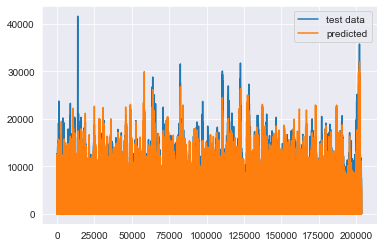

In [18]:
sns.lineplot(x=[*range(len(y_val))], y=y_val)
sns.lineplot(x=[*range(len(preds))], y=preds)
plt.legend(['test data', 'predicted'])

This does look promising

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
sqrt_mse = np.sqrt(mean_squared_error(y_val, preds))
print(f"The Square root of our mean Squared error is: {sqrt_mse}")
r2 = r2_score(y_val, preds)
print(f"The R2-Score is: {r2}")

The Square root of our mean Squared error is: 1366.5814306254904
The R2-Score is: 0.8650541559076155


Text(0.5, 1.0, 'Sales outliers')

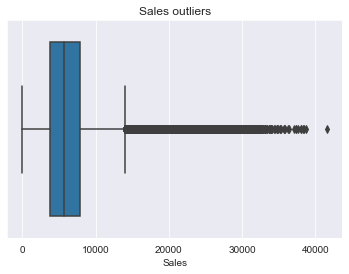

In [33]:
sns.boxplot(data=train_df, x='Sales')
plt.title("Sales outliers")

# Choosing a loss function

Since our Sales values do have outliers, I am going to chose Mean Squared Error as my loss function. 


# Training with my pipeline

In [8]:
DEPTH = [10, 15, 20, None]
ESTIMATORS = [10, 16, 20, 24, 30]
run_count = 8
for d in DEPTH:
    for e in ESTIMATORS:
        mlflow.end_run()
        model = RandomForestRegressor(
            n_estimators=d,
            max_depth=e,
            n_jobs=4,
            # random_state=77
        )
        pipeline = run_train_pipeline(model=model,
                                      x=train_df,
                                      experiment_name='RF-Regression-Model',
                                      run_name=f'run {run_count} | est-{e} | depth-{d}')
        run_count += 1
        del model
        del pipeline
        gc.collect()

        # mlflow.end_run()


{'mse': 4490438.55, 'r2': 0.68, 'mae': 1428.16}
Run params saved
Run metrics saved
figures saved with mlflow
saving dict


Successfully registered model 'RF-Regression-Model_run 8 | est-10 | depth-10_Sun-May-29-08:09:04-2022'.
2022/05/29 08:09:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: RF-Regression-Model_run 8 | est-10 | depth-10_Sun-May-29-08:09:04-2022, version 1
Created version '1' of model 'RF-Regression-Model_run 8 | est-10 | depth-10_Sun-May-29-08:09:04-2022'.


Run - run 8 | est-10 | depth-10 is logged to Experiment - RF-Regression-Model
{'mse': 1806282.77, 'r2': 0.87, 'mae': 898.9}
Run params saved
Run metrics saved
figures saved with mlflow
saving dict


Successfully registered model 'RF-Regression-Model_run 9 | est-16 | depth-10_Sun-May-29-08:10:39-2022'.
2022/05/29 08:10:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: RF-Regression-Model_run 9 | est-16 | depth-10_Sun-May-29-08:10:39-2022, version 1
Created version '1' of model 'RF-Regression-Model_run 9 | est-16 | depth-10_Sun-May-29-08:10:39-2022'.


Run - run 9 | est-16 | depth-10 is logged to Experiment - RF-Regression-Model
{'mse': 1106368.66, 'r2': 0.92, 'mae': 679.38}
Run params saved
Run metrics saved
figures saved with mlflow
saving dict


Successfully registered model 'RF-Regression-Model_run 10 | est-20 | depth-10_Sun-May-29-08:12:12-2022'.
2022/05/29 08:12:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: RF-Regression-Model_run 10 | est-20 | depth-10_Sun-May-29-08:12:12-2022, version 1
Created version '1' of model 'RF-Regression-Model_run 10 | est-20 | depth-10_Sun-May-29-08:12:12-2022'.


Run - run 10 | est-20 | depth-10 is logged to Experiment - RF-Regression-Model
{'mse': 916359.68, 'r2': 0.93, 'mae': 605.18}
Run params saved
Run metrics saved
figures saved with mlflow
saving dict


In [ ]:
import pickle
from src.dashboard_helper import (load_model, preprocess)
